In [3]:
import pandas as pd
df = pd.read_csv("Data/rides2.csv")
df.head()

,weekend,num.child,distance,rides,games,wait,clean,overall
0,1,0,114.648259,87,73,60,89,0
1,1,2,27.014097,87,78,76,87,1
2,0,1,63.300975,85,80,70,88,1
3,1,0,25.909931,88,72,66,89,0
4,0,4,54.718307,84,87,74,87,1


In [4]:
df.columns

Index(['weekend', 'num.child', 'distance', 'rides', 'games', 'wait', 'clean',
       'overall'],
      dtype='object')

In [8]:
cols = df.columns[:-1]
x = df[cols]
y = df.overall
y.value_counts()

overall
1    255
0    245
Name: count, dtype: int64

In [9]:
from imblearn.under_sampling import RandomUnderSampler
x_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(x,y)
x_samp = pd.DataFrame(data=x_sample, columns = cols)
y_samp = pd.DataFrame(data=y_sample, columns = ['overall'])
df_samp = pd.concat([x_samp, y_samp], axis = 1)

x = x_samp[cols]
y = y_samp['overall']

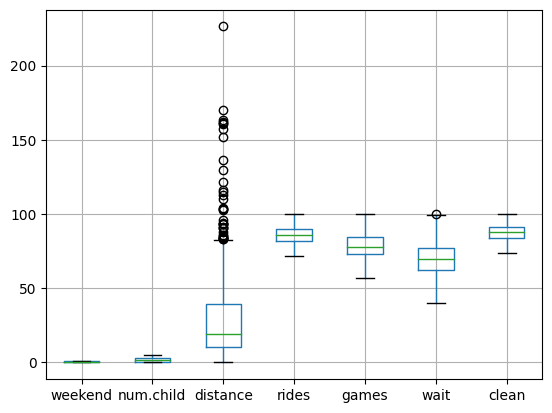

In [10]:
import matplotlib.pyplot as plt

x.boxplot()
plt.show()

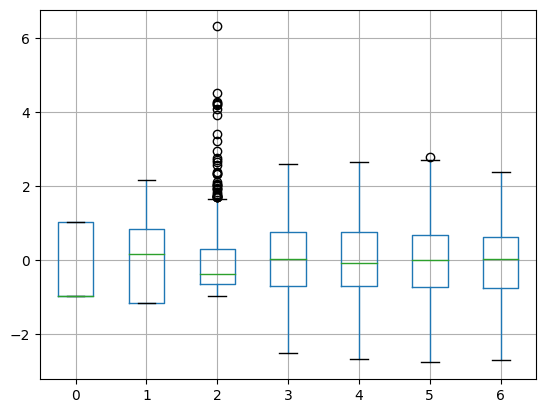

In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x)
x_scaled = pd.DataFrame(ss.transform(x))

x_scaled.boxplot()
plt.show()

In [13]:
x_scaled

,0,1,2,3,4,5,6
0,1.033204,-1.159150,2.715919,0.222582,-0.684357,-0.907906,0.232027
1,1.033204,-1.159150,-0.147105,0.405270,-0.807778,-0.351234,0.232027
2,-0.967863,2.174087,-0.251336,-0.873549,0.056169,-2.021251,-1.724830
3,1.033204,-0.492503,-0.123242,-1.604302,-0.684357,-1.093464,-0.550716
4,-0.967863,-1.159150,-0.618469,-0.690860,-1.054620,0.019881,-0.942087
...,...,...,...,...,...,...,...
485,1.033204,0.174145,0.343347,1.866777,1.166959,0.390996,1.797513
486,1.033204,0.174145,-0.285608,-0.325484,-0.314094,1.226005,-0.159344
487,-0.967863,0.840792,-0.733693,2.049465,0.673275,-1.279021,1.601828
488,1.033204,1.507440,-0.195983,1.684088,2.154327,1.318783,1.601828


In [12]:
df_ss = pd.DataFrame(ss.transform(x), columns = x.columns)
df_ss

,weekend,num.child,distance,rides,games,wait,clean
0,1.033204,-1.159150,2.715919,0.222582,-0.684357,-0.907906,0.232027
1,1.033204,-1.159150,-0.147105,0.405270,-0.807778,-0.351234,0.232027
2,-0.967863,2.174087,-0.251336,-0.873549,0.056169,-2.021251,-1.724830
3,1.033204,-0.492503,-0.123242,-1.604302,-0.684357,-1.093464,-0.550716
4,-0.967863,-1.159150,-0.618469,-0.690860,-1.054620,0.019881,-0.942087
...,...,...,...,...,...,...,...
485,1.033204,0.174145,0.343347,1.866777,1.166959,0.390996,1.797513
486,1.033204,0.174145,-0.285608,-0.325484,-0.314094,1.226005,-0.159344
487,-0.967863,0.840792,-0.733693,2.049465,0.673275,-1.279021,1.601828
488,1.033204,1.507440,-0.195983,1.684088,2.154327,1.318783,1.601828


In [16]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.logspace(-6, 3, 10)    # 10의 -6승부터 3승까지 10개의 값
tr_scores, ts_scores = validation_curve(SVC(), x, y, param_name = 'gamma', param_range = param_range, scoring = 'accuracy', n_jobs = -1)

tr_scores_mean = np.mean(tr_scores, axis = 1)
ts_scores_mean = np.mean(ts_scores, axis = 1)

print('최고정확도: ', np.max(ts_scores_mean))
print('최적 gamma: ', param_range[np.argmax(ts_scores_mean)])

최고정확도:  0.7489795918367347
최적 gamma:  0.001


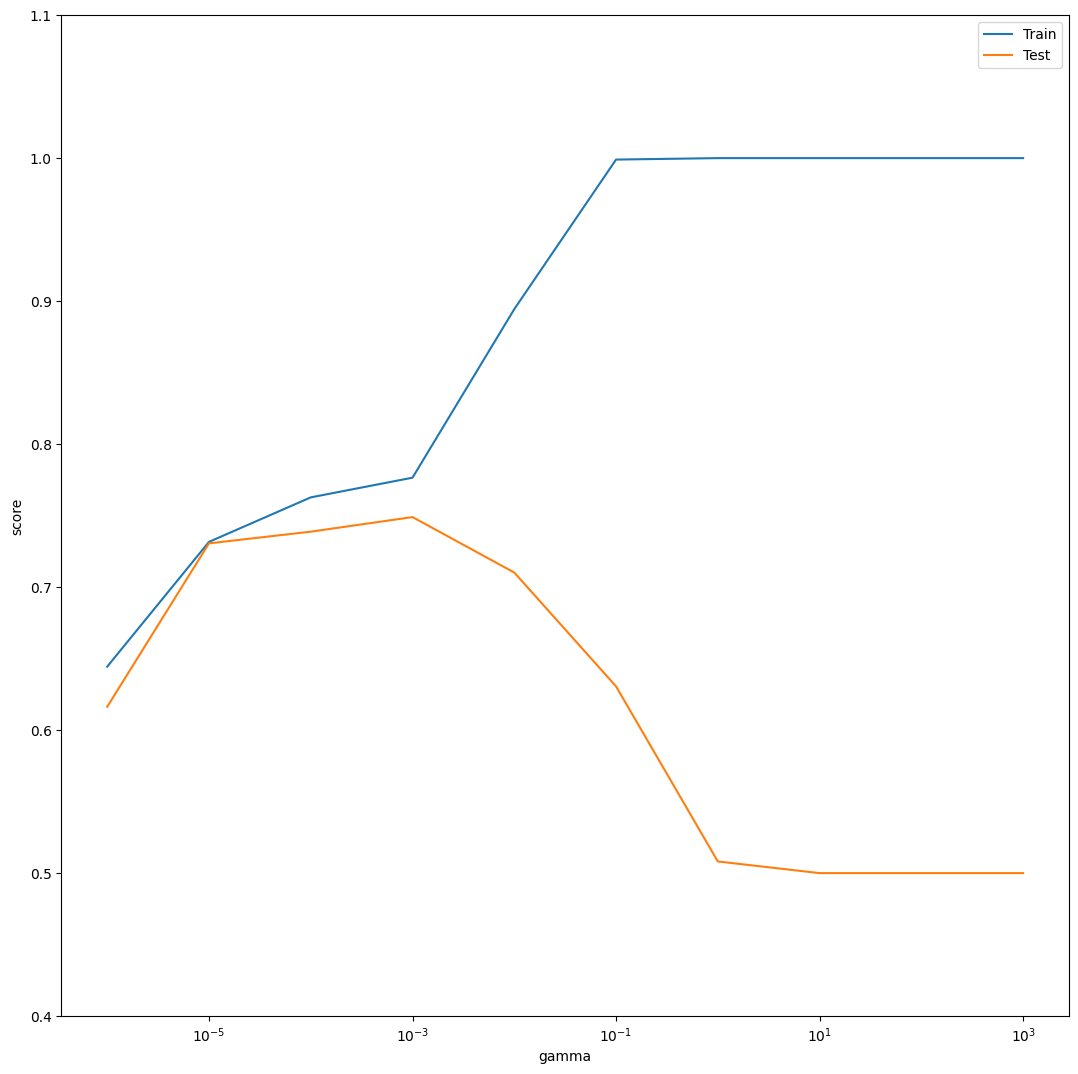

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 13))
plt.xlabel('gamma')
#plt.xlabel('C')
plt.ylabel("score")
plt.ylim(0.4, 1.1)
plt.semilogx(param_range, tr_scores_mean, label="Train")
plt.semilogx(param_range, ts_scores_mean, label="Test")
plt.legend(loc="best")
plt.show()